<a href="https://colab.research.google.com/github/vamshikondisetti/Assignment/blob/Excler_Assignments/Assignment_04_SLR_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-04-Simple Linear Regression-1

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# import dataset
df1=pd.read_csv('delivery_time.csv')
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-8-3fbadc939c74>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

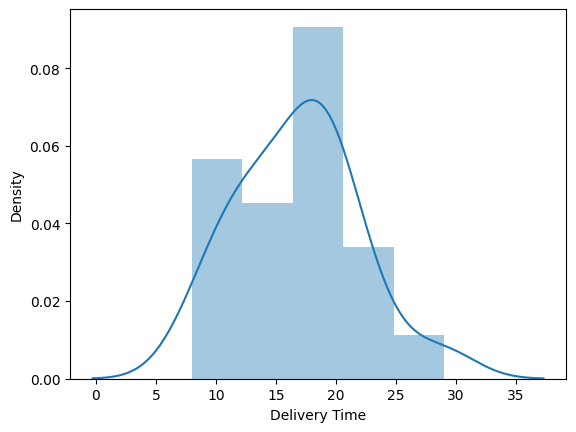

In [ ]:
sns.distplot(df1['Delivery Time'])

<ipython-input-9-01f15aa2e93b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

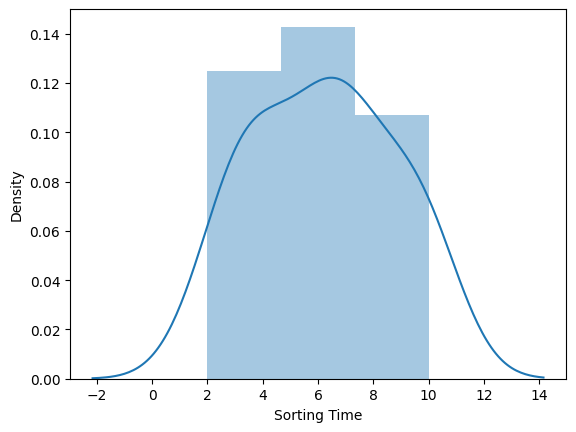

In [ ]:
sns.distplot(df1['Sorting Time'])

## Feature Engineering

In [ ]:
# Renaming Columns
df=df1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Correlation Analysis

In [ ]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

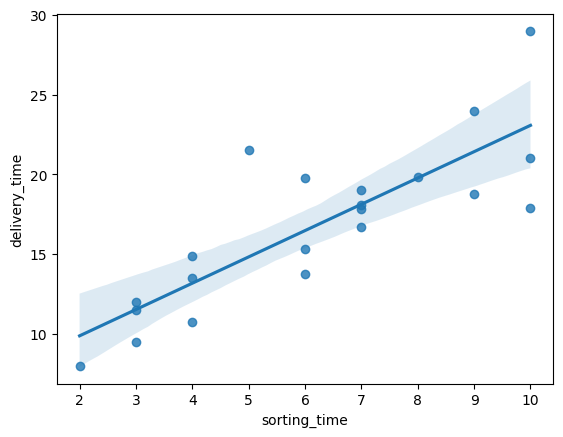

In [ ]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

## Model Building

In [ ]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

## Model Testing

In [ ]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Predictions

In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [ ]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Logrithm Transformation

y= a+ b* log(x)

In [ ]:
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# Input dataset
X_log = np.log(df1['Delivery Time'].values.reshape(-1,1))

In [ ]:
y_log = df1['Sorting Time'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [ ]:
from sklearn.linear_model import LinearRegression
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [ ]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-10.86864266]
Co-efficient Value of Log Model is :  [[6.09166216]]


In [ ]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[7.67755948],
       [6.77563916],
       [5.57895502],
       [4.98606362],
       [6.7045887 ]])

In [ ]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,10,7.677559
1,7,6.775639
2,4,5.578955
3,4,4.986064
4,10,6.704589


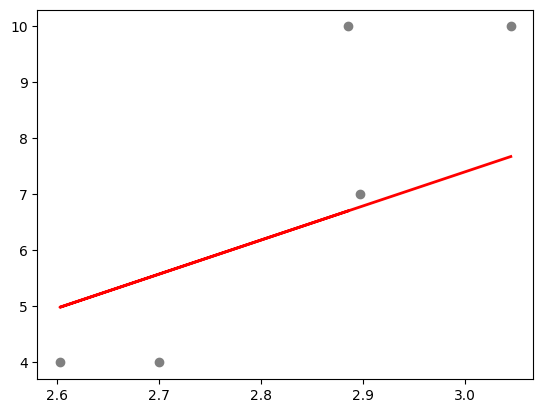

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 1.6814462601019238
Mean Squared Error: 3.9538447609187317
Root Mean Squared Error: 1.98842771076012
R^2 Score :           0.4508548943168429


# Quadratic Transformation Model

In [ ]:
#rename the Solar column
data_3 = df1.rename({'Sorting Time': 'Sorting_Time'}, axis=1)

In [ ]:
data_3

,Delivery Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data_3['Sorting_Time'] = data_3.apply(lambda row: row.Sorting_Time**2, axis =1 )
data_3

,Delivery Time,Sorting_Time
0,21.00,100.0
1,13.50,16.0
2,19.75,36.0
3,24.00,81.0
4,29.00,100.0
5,15.35,36.0
6,19.00,49.0
7,9.50,9.0
8,17.90,100.0
9,18.75,81.0


In [ ]:
X_q = data_3.iloc[:,data_3.columns != 'Churn_out_rate']
Y_q = data_3.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

0     100.0
17     49.0
15     16.0
1      16.0
8     100.0
Name: Sorting_Time, dtype: float64


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  7.105427357601002e-15
                Coefficient
Delivery Time -6.644714e-16
Sorting_Time   1.000000e+00


In [ ]:
y_pred_q_q = model.predict(X_test)

In [ ]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
0,100.0,100.0
17,49.0,49.0
15,16.0,16.0
1,16.0,16.0
8,100.0,100.0


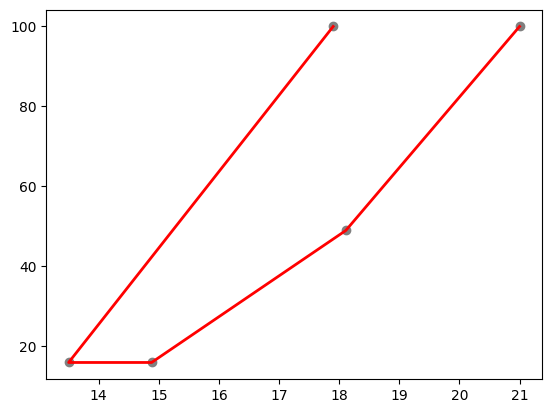

In [ ]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 1.2789769243681804e-14
Mean Squared Error: 3.3321484636535537e-28
Root Mean Squared Error: 1.8254173395838974e-14
R^2 Score :           1.0
